# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file="traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

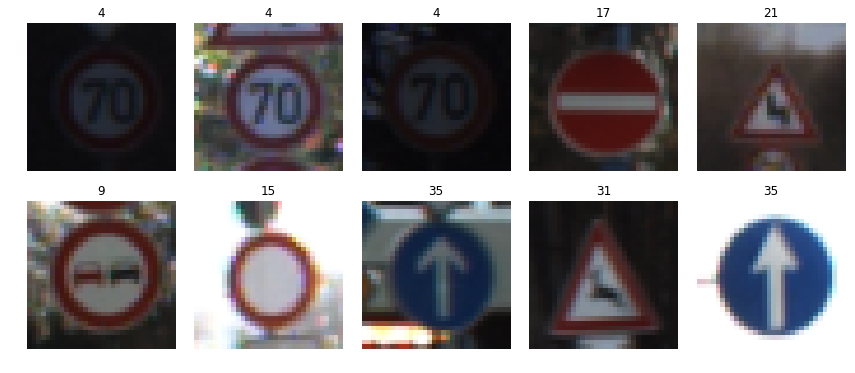

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline
# show image of 10 random data points in X_train dataset
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

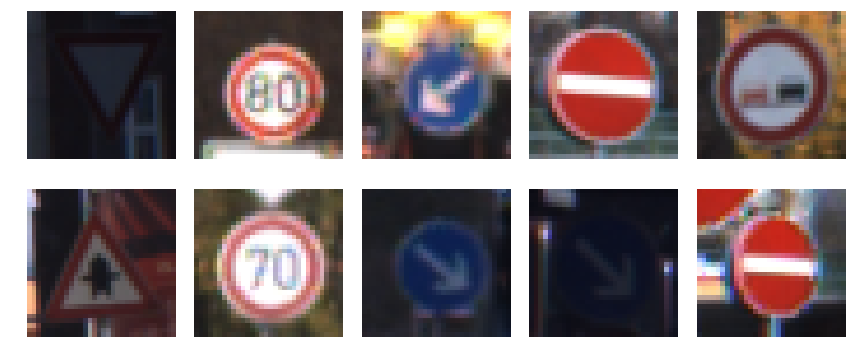

In [5]:
# show image of 10 random data points in X_valid dataset
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(X_valid))
    image = X_valid[index]
    axs[i].axis('off')
    axs[i].imshow(image)

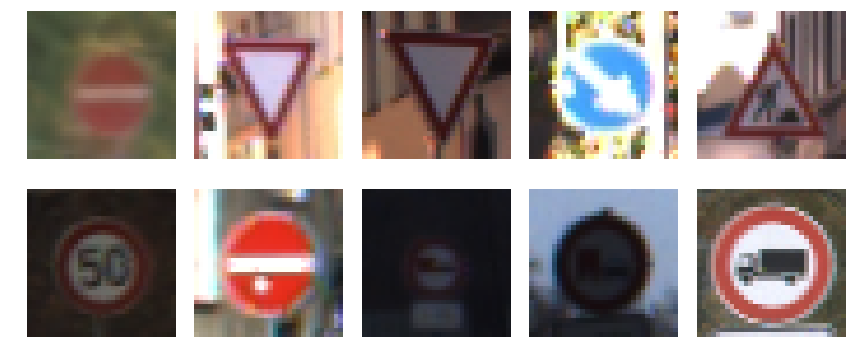

In [6]:
# show image of 10 random data points in X_test dataset
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(X_test))
    image = X_test[index]
    axs[i].axis('off')
    axs[i].imshow(image)

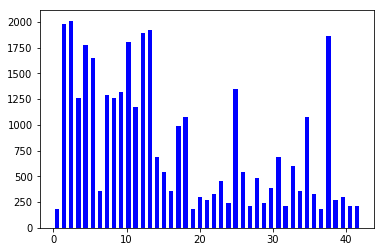

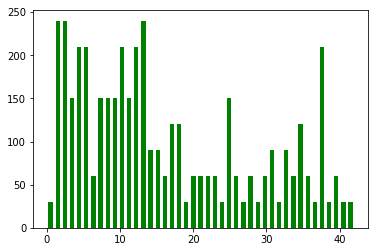

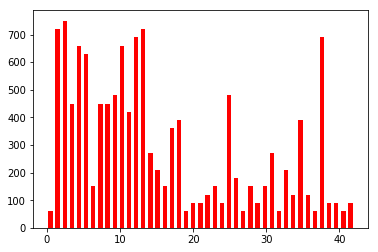

In [7]:
#plotting the count of each sign
#distribution of classes in training,validation and test sets
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.6 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='b')
plt.show()

hist, bins = np.histogram(y_valid, bins=n_classes)
width = 0.6 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color = 'g')
plt.show()

hist, bins = np.histogram(y_test, bins=n_classes)
width = 0.6 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color = 'r')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

shape in/out: (32, 32, 3) (32, 32, 3)


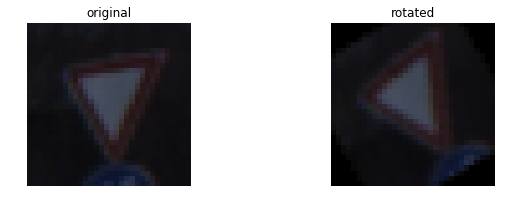

In [8]:
# rotate image     
from skimage.transform import rotate
def rotate_image(image):
    img = rotate(image, 30.0)
    return img  

test_img = X_train[1000]
test_dst = rotate_image(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('rotated')

print('shape in/out:', test_img.shape, test_dst.shape)

shape in/out: (32, 32, 3) (32, 32, 3)


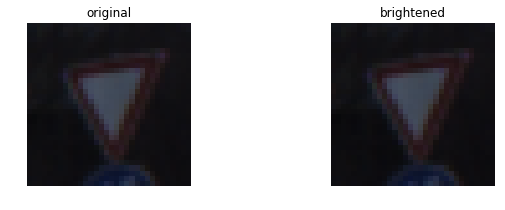

In [9]:
# function to increase brightness of images
# will choose images randomly for this function 
import cv2 

def increase_brightness(img,value=20):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)#convert it to hsv
    h, s, v = cv2.split(hsv)
    v += 255
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

    
test_img = X_train[1000]
test_dst = increase_brightness(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('brightened')

print('shape in/out:', test_img.shape, test_dst.shape)

shape in/out: (32, 32, 3) (32, 32, 3)


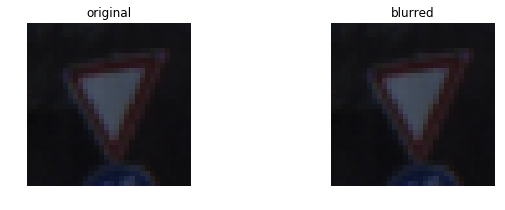

In [10]:
# function to blur image
# will choose images randomly to blur

def blur_image(img):
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(img,img, mask= mask)
    median = cv2.medianBlur(res,15)
    return img

    
test_img = X_train[1000]
test_dst = blur_image(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('blurred')

print('shape in/out:', test_img.shape, test_dst.shape)

In [11]:
# Augment images randomly with above methods as new added images
# which will be concatanate with existing X_train to form new training dataset

print('X_train, y_train shapes before adding new images:', X_train.shape, y_train.shape)

for class_n in range(n_classes):
    X_train_new= []
    y_train_new = []
    class_indices = np.where(y_train == class_n)
    n_samples = int(len(class_indices[0]) * 0.3)
    for i in range(n_samples):
        index = random.randint(0, len(class_indices[0]))
        new_img = X_train[index]
        new_img_label = y_train[index]
        new_img =  rotate_image(increase_brightness(blur_image(image),value=20))
        X_train_new.append(new_img)
        y_train_new.append(new_img_label)
    X_train = np.concatenate((X_train, X_train_new), axis=0)
    y_train = np.concatenate((y_train, y_train_new), axis=0)
print('X_train, y_train shapes after adding new augmentated images:', X_train.shape, y_train.shape)        
# #         new_X.append(class_indices[0][i%n_samples])
# #         new_y.append(X_train.shape[0])
#             new_img = X_train[class_indices[0][i % n_samples]]
#             new_img =  rotate_image(increase_brightness(blur_image(image),value=20))
#             X_train_new = np.concatenate((X_train, [new_img]), axis=0)
#             y_train = np.concatenate((y_train, [class_n]), axis=0)
#     print(class_indices)

X_train, y_train shapes before adding new images: (34799, 32, 32, 3) (34799,)
X_train, y_train shapes after adding new augmentated images: (46892, 32, 32, 3) (46892,)


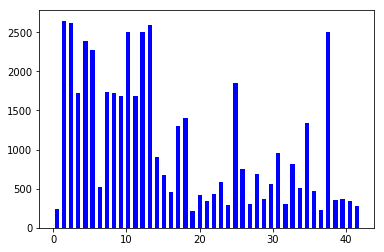

In [12]:
# visualize new X_train labels
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.6 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='b')
plt.show()

In [13]:
# Implement Min-Max scaling for grayscale image data
# tested it is better performance than pixel-128/128
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.0, 1.0]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.0
    b = 1.0
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

In [14]:
# Preprocess the data here. It is required to normalize the data. 

# grayscale and normalize the data
# ensoure data is 3D (32,32,1)
X_train2 = []
for i in range(len(X_train)):
    img = np.uint8(X_train[i])
    gray= cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#     gray = (gray - 128)/128
    gray = normalize_grayscale(gray)
    X_train2.append(gray)
    
X_valid2 = []
for i in range(len(X_valid)):
    img = np.uint8(X_valid[i])
    gray= cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#     gray = (gray - 128)/128
    gray = normalize_grayscale(gray)
    X_valid2.append(gray)

X_test2 = []
for i in range(len(X_test)):
    img = np.uint8(X_test[i])
    gray= cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#     gray =(gray - 128)/128
    gray = normalize_grayscale(gray)
    X_test2.append(gray)
    
print(len(X_train2),len(X_valid2),len(X_test2))

46892 4410 12630


In [15]:
print(X_train2[900].shape, X_valid2[300].shape, X_test2[700].shape)

(32, 32) (32, 32) (32, 32)


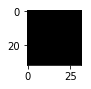

In [16]:
#plotting traffic sign images
index = random.randint(0,len(X_train2))
image = X_train2[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image,cmap='gray')

In [17]:
# mean before normalization
print(np.mean(X_train))
print(np.mean(X_valid))
print(np.mean(X_test))
# mean after normalization
print(np.mean(X_train2))
print(np.mean(X_valid2))
print(np.mean(X_test2))

61.4677550589
83.5564273756
82.1484603612
0.238398287211
0.324523083539
0.318735230199


In [18]:
#turn the input data from (32,32) to 3D (32,32,1)
X_train=[]
for i in range(len(X_train2)):
    img_expanded_train = X_train2[i][:,:,np.newaxis]
    X_train.append(img_expanded_train)

X_valid=[]
for i in range(len(X_valid2)):
    img_expanded_valid = X_valid2[i][:,:,np.newaxis]
    X_valid.append(img_expanded_valid)    

X_test=[]
for i in range(len(X_test2)):
    img_expanded_test = X_test2[i][:,:,np.newaxis]
    X_test.append(img_expanded_test)
    
print(X_train[5290].shape,X_valid[200].shape,X_test[2890].shape)

(32, 32, 1) (32, 32, 1) (32, 32, 1)


### Model Architecture
Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

Architecture
Layer 1: Convolutional. The output shape should be 28x28x6.

Activation. Your choice of activation function.

Pooling. The output shape should be 14x14x6.

Layer 2: Convolutional. The output shape should be 10x10x16.

Activation. Your choice of activation function.

Pooling. The output shape should be 5x5x16.

Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.

Layer 3: Fully Connected. This should have 120 outputs.

Activation. Your choice of activation function.

Layer 4: Fully Connected. This should have 84 outputs.

Activation. Your choice of activation function.

Layer 5: Fully Connected (Logits). This should have 10 outputs.

Output
Return the result of the 2nd fully connected layer.

In [19]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
       
    # Add dropout before feed to last fully connected layer to prevent overfitting
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43 (n_classes).
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

##### Features and Labels

In [20]:
import tensorflow as tf
tf.reset_default_graph() 

# x is a placeholder for a batch of input images. 
# y is a placeholder for a batch of output labels.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

##### Training Pipeline

In [21]:
rate = 0.0005

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

##### Model Evaluation Function

In [22]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

##### Train the Model
Calculate and report the accuracy on the training and validation set.

In [23]:
EPOCHS = 200
BATCH_SIZE = 128

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        training_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.400
Validation Accuracy = 0.443

EPOCH 2 ...
Training Accuracy = 0.572
Validation Accuracy = 0.695

EPOCH 3 ...
Training Accuracy = 0.626
Validation Accuracy = 0.762

EPOCH 4 ...
Training Accuracy = 0.668
Validation Accuracy = 0.825

EPOCH 5 ...
Training Accuracy = 0.689
Validation Accuracy = 0.843

EPOCH 6 ...
Training Accuracy = 0.695
Validation Accuracy = 0.866

EPOCH 7 ...
Training Accuracy = 0.710
Validation Accuracy = 0.880

EPOCH 8 ...
Training Accuracy = 0.714
Validation Accuracy = 0.880

EPOCH 9 ...
Training Accuracy = 0.725
Validation Accuracy = 0.891

EPOCH 10 ...
Training Accuracy = 0.724
Validation Accuracy = 0.892

EPOCH 11 ...
Training Accuracy = 0.729
Validation Accuracy = 0.907

EPOCH 12 ...
Training Accuracy = 0.733
Validation Accuracy = 0.909

EPOCH 13 ...
Training Accuracy = 0.735
Validation Accuracy = 0.912

EPOCH 14 ...
Training Accuracy = 0.738
Validation Accuracy = 0.916

EPOCH 15 ...
Training Accuracy = 0.741
Valid

In [25]:
# Once a final model architecture is selected, 
# the accuracy on the test set should be calculated and reported as well.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.933


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

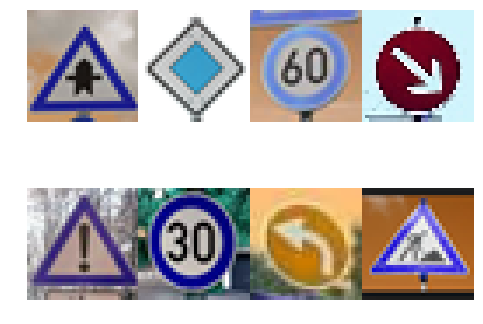

In [26]:
# Load the images found from web and plot them here
import glob
web_images = []
fig,axs = plt.subplots(2,4,figsize=(8,6))
fig.subplots_adjust(hspace=.2,wspace=.002)
axs = axs.ravel()
for i, img in enumerate(glob.glob('examples/*.png')):
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(image)
    web_images.append(image)

In [27]:
# y label for web images
y_web = [11, 12, 3, 38, 18,1,34, 25]

In [28]:
# grayscale and normalize the web images first
X_web = []
for i in range(len(web_images)):
    gray= cv2.cvtColor(web_images[i],cv2.COLOR_RGB2GRAY)
    gray = normalize_grayscale(gray)
    img_expanded = gray[:,:,np.newaxis]
    X_web.append(img_expanded)

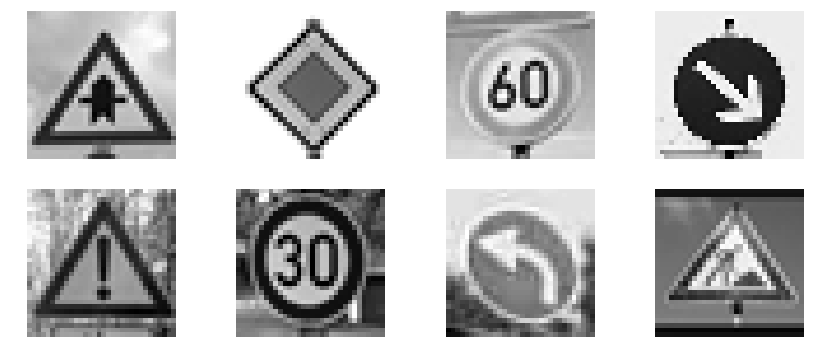

In [29]:
# show images
fig, axs = plt.subplots(2,4, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(len(X_web)):
    image = X_web[i].squeeze()
    axs[i].axis('off')
    axs[i].imshow(image,cmap='gray')
#     plt.imshow(image,cmap='gray')

In [30]:
print(len(X_web), len(y_web))

8 8


### Predict the Sign Type for Each Image

In [31]:
# Once a final model architecture is selected, 
# the accuracy on the test set should be calculated and reported as well.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    web_image_accuracy = evaluate(X_web, y_web)
    print("Web Image Accuracy = {:.3f}".format(web_image_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Web Image Accuracy = 0.750


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [33]:
# Print out the top five softmax probabilities for the predictions 
# on the German traffic sign images found on the web. 

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: X_web, keep_prob: 1.0})
    values,indices = sess.run(top_k,feed_dict={x: X_web, keep_prob: 1.0})
print(values, indices)

INFO:tensorflow:Restoring parameters from ./lenet
[[  1.00000000e+00   1.34324388e-12   6.91444218e-16   4.15413867e-18
    2.07773729e-26]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  9.99971390e-01   2.85842380e-05   1.20358412e-09   2.07426472e-11
    1.62081145e-12]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   1.30338902e-32   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  6.39133573e-01   3.60866398e-01   7.63609947e-32   5.15263255e-32
    4.48792206e-38]
 [  1.00000000e+00   1.55883969e-25   5.20872653e-26   2.49145769e-31
    6.21531015e-36]
 [  6.17030442e-01   3.35868508e-01   2.55320650e-02   2.01739427e-02
    1.39464159e-03]] [[11 30 27 21 40]
 [12  0  1  2  3]
 [ 3  1  2 28  5]
 [38  0  1  2  3]
 [18 27  0  1  2]
 [ 2  1  5  3 38]
 [34  3 38 35 36]
 [29 39 22 25 24]]


In [1]:
# Re-capture the top_k and Top 5 Softmax Probabilities For Each Image Found on the Web
import numpy as np
values = [[  1.00000000e+00,   1.34324388e-12,   6.91444218e-16,   4.15413867e-18,  2.07773729e-26],
     [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,  0.00000000e+00],
     [  9.99971390e-01,   2.85842380e-05,   1.20358412e-09,   2.07426472e-11,  1.62081145e-12],
     [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,  0.00000000e+00],
     [  1.00000000e+00,   1.30338902e-32,   0.00000000e+00,   0.00000000e+00,  0.00000000e+00],
     [  6.39133573e-01,   3.60866398e-01,   7.63609947e-32,   5.15263255e-32,  4.48792206e-38],
     [  1.00000000e+00,   1.55883969e-25,   5.20872653e-26,   2.49145769e-31,  6.21531015e-36],
     [  6.17030442e-01,   3.35868508e-01,   2.55320650e-02,   2.01739427e-02,  1.39464159e-03]]
    
indices = [[11, 30, 27, 21, 40],
     [12,  0,  1,  2,  3],
     [ 3,  1,  2, 28,  5],
     [38,  0,  1,  2,  3],
     [18, 27,  0,  1,  2],
     [ 2,  1,  5,  3, 38],
     [34,  3, 38, 35, 36],
     [29, 39, 22, 25, 24]]

In [3]:
# The same grayscale and normalization function with all the other datasets
# Implement Min-Max scaling for grayscale image data
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.0, 1.0]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.0
    b = 1.0
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

In [4]:
# Load the images found from web and plot them here
import glob
import matplotlib.pyplot as plt
import cv2
web_images = []
fig,axs = plt.subplots(2,4,figsize=(8,6))
fig.subplots_adjust(hspace=.2,wspace=.002)
axs = axs.ravel()
for i, img in enumerate(glob.glob('examples/*.png')):
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(image)
    web_images.append(image)

In [5]:
# y label for web images
y_web = [11, 12, 3, 38, 18,1,34, 25]

In [6]:
# grayscale and normalize the web images first
X_web = []
for i in range(len(web_images)):
    gray= cv2.cvtColor(web_images[i],cv2.COLOR_RGB2GRAY)
    gray = normalize_grayscale(gray)
    img_expanded = gray[:,:,np.newaxis]
    X_web.append(img_expanded)

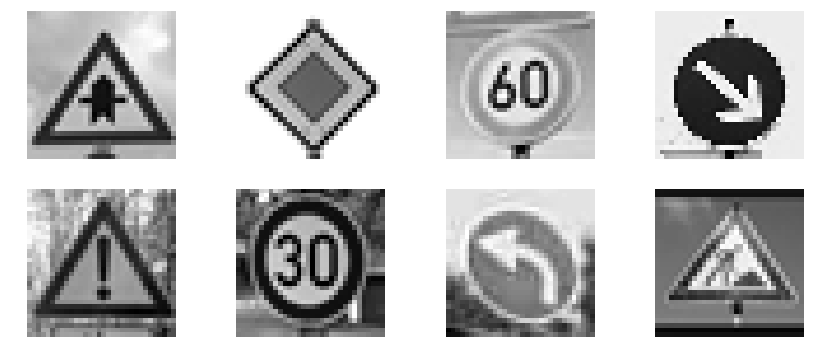

In [7]:
# show images
fig, axs = plt.subplots(2,4, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(len(X_web)):
    image = X_web[i].squeeze()
    axs[i].axis('off')
    axs[i].imshow(image,cmap='gray')

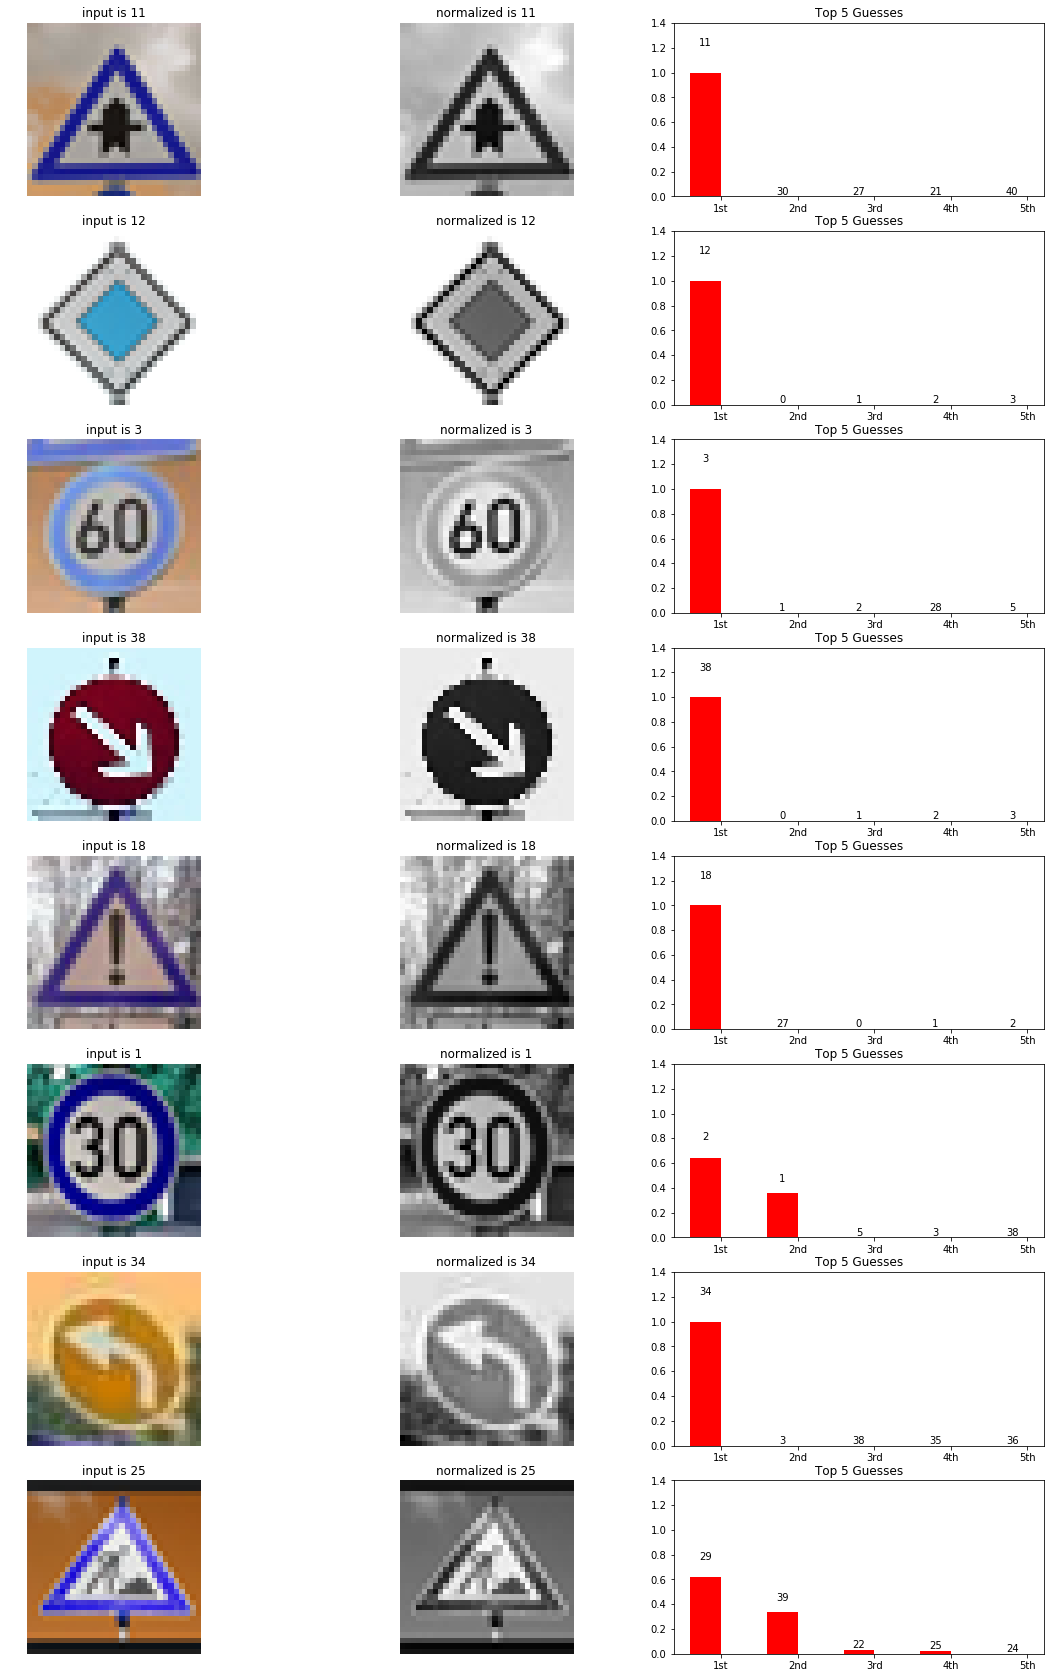

In [8]:
from __future__ import division
fig, ax = plt.subplots(len(web_images),3,figsize=(20,30))
fig.subplots_adjust(hspace = .20, wspace=.005)
ax = ax.ravel()
width = 0.4 # width of the bars
x = [1,2,3,4,5]        
for i in range(8):
    val = values[i]
    top_guesses = indices[i]
    
    ax[3*i].axis('off')
    ax[3*i].imshow(web_images[i])
    ax[3*i].set_title('input is {}'.format(y_web[i])) 
    
    ax[3*i+1].axis('off')
    ax[3*i+1].imshow(X_web[i].reshape(32,32),cmap = 'gray')
    ax[3*i+1].set_title('normalized is {}'.format(y_web[i])) 

    rects = ax[3*i+2].bar(x, val, width, color='r')
    ax[3*i+2].set_ylim(0,1.4)
    ax[3*i+2].set_title('Top 5 Guesses')
    ax[3*i+2].set_xticks(np.add(x,(width/2))) # set the position of the x ticks
    ax[3*i+2].set_xticklabels(('1st', '2nd', '3rd', '4th', '5th'))
    # attach top 5 possibility labels on the top of each bar
    for j,rect in enumerate(rects):
        height = rect.get_height()
        ax[3*i+2].text(rect.get_x() + rect.get_width()/2., 1.2*height, str(top_guesses[j]),ha='center', va='bottom')
plt.show()

### Analyze Performance

Two incorrect predictions over 6 correct predictions to the 8 new images found on the internet, so the model shows 75% accuracy on these new images predictions. The two wrongly predicted images are: 
1. "Speed limit of 30km/h" was wrongly predicted as "Speed limit 50km/h", the model was close to predict correctly as its second highest probability is correct as itself.
2. "Roadwork" was wrongly predicted as "Bicyble crossing" as first guess, "Keep left" as second guess. The correct label was in its 4th guess.

The images among the correct label and wrongly predicted labels contain pariticial simalities. Such as, the model could not see the difference between 30 and 50 to some images; pedestrian are shown on both roadwork sign and bicycles corssing signs, which confused the model.

Further work can be focusing on improving the model on these relatively difficult classes.
